<a href="https://colab.research.google.com/github/SidneyJunior01234/Sistemas-Operacionais---Threads/blob/main/Trabalho_Thread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Referências**

**Pycachesim github: https://github.com/RRZE-HPC/pycachesim**

**Pycachesim pypi.org: https://pypi.org/project/pycachesim/#description**

**Threading docs.python.org: https://docs.python.org/3/library/threading.html**

**Threading geeks for geeks: https://www.geeksforgeeks.org/multithreading-in-python-set-2-synchronization/**

#**Instalação da Biblioteca Pycachesim**

In [ ]:
!pip install pycachesim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Importando Bibliotecas**

**Inportando pandas para ler o o arquivo de endereços**

**Inportando threading para utilizar as threads**

**Inportando cachesim para simular a cache de acordo com os enderecos**

**Importando time para verificar tempo de execução das threads**

In [ ]:
import pandas as pd

from cachesim import CacheSimulator, Cache, MainMemory
import threading

import time

#**Importando Endereços**

**Importando os endereços do github e verificando os dados**

In [ ]:
enderecos = pd.read_csv('https://raw.githubusercontent.com/SidneyJunior01234/Sistemas-Operacionais---Threads/main/Teste%20Thread/enderecos.dat', sep='::', engine='python', header=None).rename(columns = {0: 'enderecos'})

enderecos.head()

,enderecos
0,0
1,1
2,2
3,3
4,4


#**Criação da Memória e Função de Mapeamento**

**Criando memória principal**

In [ ]:
memoria_principal = MainMemory('MemoriaPrincipal')

**Função auxiliar que realiza o mapeamento e imprime o resultado**

In [ ]:
def Mapeamento(mm:MainMemory,enderecos,nome:str,conjuntos:int,vias:int,tamanho:int = 4):
  cache = Cache(nome, conjuntos, vias, tamanho)

  mm.load_to(cache)
  mm.store_from(cache)

  cs = CacheSimulator(cache, mm)

  for endereco in range(enderecos.size):
    cs.load(enderecos.iloc[endereco])

  cs.force_write_back()
  cs.print_stats()
  print('\n')
  

#**Teste de Mapeamentos**

**Teste de Mapeamento Direto**

In [ ]:
Mapeamento(memoria_principal,enderecos,'MapeamentoDireto',256,1,4)

CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapeamentoDireto  10019 (   10019B)   1681 (    1681B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   1681 (    1681B)      0 (       0B)   1681 (    1681B)      0 (       0B)      0 (       0B)




**Teste de Mapeamento Associativo em Conjunto 2 Vias**

In [ ]:
Mapeamento(memoria_principal,enderecos,'MapAssoConj2Vias',128,2,4)

CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapAssoConj2Vias  10019 (   10019B)   1681 (    1681B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   1681 (    1681B)      0 (       0B)   1681 (    1681B)      0 (       0B)      0 (       0B)




**Teste de Mapeamento Associativo em Conjunto 4 Vias**

In [ ]:
Mapeamento(memoria_principal,enderecos,'MapAssoConj4Vias',128,4,4)

CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapAssoConj4Vias  10019 (   10019B)   1681 (    1681B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   1681 (    1681B)      0 (       0B)   1681 (    1681B)      0 (       0B)      0 (       0B)




**Teste de Mapeamento Associativo em Conjunto 8 Vias**

In [ ]:
Mapeamento(memoria_principal,enderecos,'MapAssoConj8Vias',128,8,4)

CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapAssoConj8Vias  10019 (   10019B)   1681 (    1681B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   1681 (    1681B)      0 (       0B)   1681 (    1681B)      0 (       0B)      0 (       0B)




**Teste de Mapeamento Associativo em Conjunto 16 Vias**

In [ ]:
Mapeamento(memoria_principal,enderecos,'MapAssoConj16Vias',128,16,4)

CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapAssoConj16Vias  10019 (   10019B)   1681 (    1681B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   1681 (    1681B)      0 (       0B)   1681 (    1681B)      0 (       0B)      0 (       0B)




**Teste de Mapeamento Totalmente Associativo**

In [ ]:
Mapeamento(memoria_principal,enderecos,'MapTotAss',1,2,4)

CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapTotAss   8775 (    8775B)   2925 (    2925B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   2925 (    2925B)      0 (       0B)   2925 (    2925B)      0 (       0B)      0 (       0B)




#**Teste de Threads com Sincronização**

**Exemplo do site Geeks For Geeks, com utilização do método Lock( ) para bloquear o acesso de uma thread a variável global. Lock possui acquire( ) para bloquear ou não uma thread e release( ) para desbloquear uma thread.**

**O método Lock( ) permite implementar a sincronização de threads. O acquire( ) força as threads a funcionarem sincronizadamente.**

In [ ]:
#variavel global
x = 0
  
def increment():
    """
    funcao que uncrementa a variavel global x
    """
    global x
    x += 1
  
def thread_task(lock):
    """
    tarefa da trade
    chamadas de incremento 100000 repetições.
    """
    for _ in range(100000):
        lock.acquire()
        increment()
        lock.release()
  
def main_task():
    global x
    #iniciando a variavel global como 0
    x = 0
  
    #criando o lock
    lock = threading.Lock()
  
    #criando as threads
    t1 = threading.Thread(target=thread_task, args=(lock,))
    t2 = threading.Thread(target=thread_task, args=(lock,))
  
    #iniciando as threads
    t1.start()
    t2.start()
  
    #aguardando a finalização das threads
    t1.join()
    t2.join()
  
if __name__ == "__main__":
    for i in range(10):
        main_task()
        print("Iterações {0}: x = {1}".format(i,x))

Iterações 0: x = 200000
Iterações 1: x = 200000
Iterações 2: x = 200000
Iterações 3: x = 200000
Iterações 4: x = 200000
Iterações 5: x = 200000
Iterações 6: x = 200000
Iterações 7: x = 200000
Iterações 8: x = 200000
Iterações 9: x = 200000


**Caso não utilizado a sincronização das threads, os valores impressos seriam diferentes do esperado.**

#**Simulação dos Mapeamentos com Threads**

**Verificando lista de Endereços e a Memória Principal**

In [ ]:
enderecos.head()

,enderecos
0,0
1,1
2,2
3,3
4,4


In [ ]:
print(memoria_principal)
print(memoria_principal.name)

MainMemory(last_level_load=MapTotAss, last_level_store=MapTotAss)
MemoriaPrincipal


**Na função TarefaThread, temos:**

**@param lock que recebe um threading.Lock()**

**@param mapeamento recebe um inteiro associado ao mapeamento:**

**1 - Mapeamento Direto**

**2 - Mapeamento Associativo em conjunto com 2 vias**

**3 - Mapeamento Associativo em conjunto com 4 vias**

**4 - Mapeamento Associativo em conjunto com 8 vias**

**3 - Mapeamento Associativo em conjunto com 16 vias**

**6 - Mapeamento Totalmente Associativo**

**Tempo de execução**

In [ ]:
tempoExecucao = {'1':[],'2':[],'3':[],'4':[],'5':[],'6':[]}

In [ ]:
def TarefaThread(lock,mapeamento:int):
  lock.acquire()
  
  tempo = 0
  inicio = time.time()
  if mapeamento == 1:
    Mapeamento(memoria_principal,enderecos,'MapeamentoDireto',256,1,4)
  elif mapeamento == 2:
    Mapeamento(memoria_principal,enderecos,'MapAssoConj2Vias',128,2,4)
  elif mapeamento == 3:
    Mapeamento(memoria_principal,enderecos,'MapAssoConj4Vias',128,4,4)
  elif mapeamento == 4:
    Mapeamento(memoria_principal,enderecos,'MapAssoConj8Vias',128,8,4)
  elif mapeamento == 5:
    Mapeamento(memoria_principal,enderecos,'MapAssoConj16Vias',128,16,4)
  elif mapeamento == 6:
    Mapeamento(memoria_principal,enderecos,'MapTotAss',1,2,4)
  else:
    pass
  
  fim = time.time()
  tempo = fim - inicio

  tempoExecucao[str(mapeamento)].append(tempo)

  lock.release()

**Tarefa principal / Thread principal**

**Memória Principal como variável global**

In [ ]:
def TarefaPrincipal():

  global memoria_principal
  memoria_principal = MainMemory('MemoriaPrincipal')

  lock = threading.Lock()

  threadMD = threading.Thread(target=TarefaThread, args=(lock,1))
  threadMAC2V = threading.Thread(target=TarefaThread, args=(lock,2))
  threadMAC4V = threading.Thread(target=TarefaThread, args=(lock,3))
  threadMAC8V = threading.Thread(target=TarefaThread, args=(lock,4))
  threadMAC16V = threading.Thread(target=TarefaThread, args=(lock,5))
  threadMTA = threading.Thread(target=TarefaThread, args=(lock,6))

  threadMD.start()
  threadMAC2V.start()
  threadMAC4V.start()
  threadMAC8V.start()
  threadMAC16V.start()
  threadMTA.start()

  threadMD.join()
  threadMAC2V.join()
  threadMAC4V.join()
  threadMAC8V.join()
  threadMAC16V.join()
  threadMTA.join()

**Executando Simulação**

CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapeamentoDireto  10019 (   10019B)   1681 (    1681B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   1681 (    1681B)      0 (       0B)   1681 (    1681B)      0 (       0B)      0 (       0B)


CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapAssoConj2Vias  10019 (   10019B)   1681 (    1681B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   1681 (    1681B)      0 (       0B)   1681 (    1681B)      0 (       0B)      0 (       0B)


CACHE *******HIT******** *******MISS******* *******LOAD******* ******STORE******* ******EVICT*******
MapAssoConj4Vias  10019 (   10019B)   1681 (    1681B)  11700 (   11700B)      0 (       0B)      0 (       0B)
MemoriaPrincipal   1681 (    1681B)      0 (       0B)   1681 (    1681B)      0 (       0B)      0 (       0B)


CACHE *******HIT***

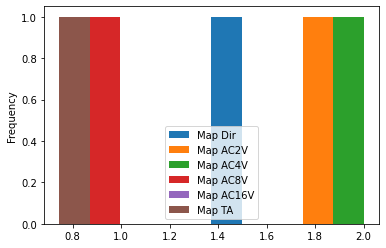

In [ ]:
if __name__ == "__main__":
  TarefaPrincipal() 

  df = pd.DataFrame(data=tempoExecucao)

  print(df)
  df.rename(columns = {'1':'Map Dir','2':'Map AC2V','3':'Map AC4V','4':'Map AC8V','5':'Map AC16V','6':'Map TA'}, inplace = True)
  print(f'\n{df}')

  df.plot(kind='hist')